In [3]:
import matplotlib.pyplot as plt
import apogee.tools.read as apread
import numpy as np
import binPlot

In [14]:
# Emmanuel's Code for generating CCFs from the SDSS Server directly
apogeeIDs,locationIDs = np.loadtxt('Bisector/APOGEE_Paths.lis',skiprows=0,usecols=[0,1],unpack=True, dtype=str)
targetCount = len(locationIDs)
for i in range(len(locationIDs)):
    locationID = int(locationIDs[i])
    apogeeID = apogeeIDs[i]
    badheader, header = apread.apStar(locationID, apogeeID, ext=0, header=True)
    nvisits = header['NVISITS']
    #print('Plotting: ' + locationIDs[i] + ', ' + apogeeIDs[i] + ', nvisits: ' + str(nvisits))
    #print(str(i + 1) + '/' + str(targetCount) + ' targets completed')
    for visit in range(1, nvisits):
        data = apread.apStar(locationID, apogeeID, ext=9, header=False)
        if (nvisits != 1):
            spec = apread.apStar(locationID, apogeeID, ext=1, header=False)[1+visit]
            specerr = apread.apStar(locationID, apogeeID, ext=2, header=False)[1+visit]
            ccf = data['CCF'][0][1+visit]
        else:
            spec = apread.apStar(locationID, apogeeID, ext=1, header=False)
            specerr = apread.apStar(locationID, apogeeID, ext=2, header=False)
            ccf = data['CCF'][0]
        
        binPlot.plotCOMPCCF(locationID, apogeeID, visit, header['VRAD' + str(visit)], [[ccf, 'blue', 'Off. CCF']], '',folder='CCF')

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import math
import matplotlib.mlab as mlab
from astropy.io import fits
import pylab as pl
import matplotlib.lines as mlines
% matplotlib inline

In [23]:
# Function developed to find the index of values in the most populated bin of 2D histogram (Developed by Graham)
def find_index(x_val, y_val, x_range, y_range, x_ind, y_ind):
    xmin=x_range[x_ind]
    xmax=x_range[x_ind+1]
    ymin=y_range[y_ind]
    ymax=y_range[y_ind+1]
    x_true=np.where(np.logical_and(x_val>=xmin,x_val<xmax))[0]
    y_true=np.where(np.logical_and(y_val>=ymin, y_val<ymax))[0]
    true_indicies=[i for i in x_true if i in y_true]
    return true_indicies #Returns the indicies for the 2MASSID 

25.66


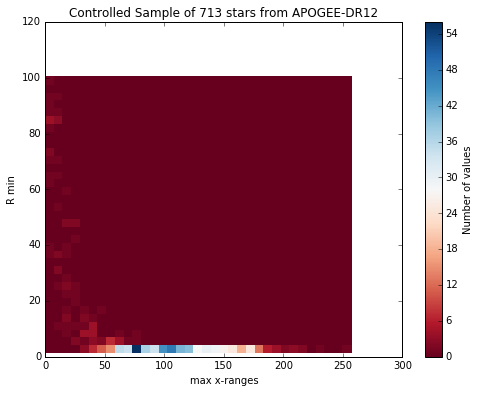

In [38]:
# Reading in the txt associated with the R and x-range values
SBR, SBXmax, SBWidth = np.loadtxt('DR12_SB9Rmin_XR_Max.lis',usecols=[2,3,4], skiprows=1,unpack=True, dtype=float)
#DLR, DLXmax,DLWidth  = np.loadtxt('Drews_List_Rmin_XR_Max.lis',usecols=[2,3,4], skiprows=1,unpack=True, dtype=float)
DLR2, DLXmax2,DLWidth2 = np.loadtxt('DrewsList_BC2Rmin_XR_Max.lis',usecols=[2,3,4], skiprows=1,unpack=True, dtype=float)
ALR, ALX,ALWidth = np.loadtxt('APOGEE_ControlRmin_XR_Max.lis',usecols=[2,3,4], skiprows=1,unpack=True, dtype=float)
print(ALR[2])

# Mass IDs for all lists
SBmassID = np.loadtxt('DR12_SB9Rmin_XR_Max.lis',skiprows=1,dtype = str, usecols=[1])
#MassID = np.loadtxt('Drews_List_Rmin_XR_Max.lis',skiprows=1,dtype=str,usecols=[1])
DmassID = np.loadtxt('DrewsList_BC2Rmin_XR_Max.lis',skiprows=1,dtype=str,usecols=[1])
AmassID = np.loadtxt('APOGEE_ControlRmin_XR_Max.lis',skiprows=1,dtype=str,usecols=[1])

# Field IDs for all lists
SBlocationID = np.loadtxt('DR12_SB9Rmin_XR_Max.lis',skiprows=1,dtype = str, usecols=[0])
#DL_locationID = np.loadtxt('Drews_List_Rmin_XR_Max.lis',skiprows=1,dtype = str, usecols=[0])
DL2_locationID = np.loadtxt('DrewsList_BC2Rmin_XR_Max.lis',skiprows=1,dtype=str,usecols=[0])
APlocationID = np.loadtxt('APOGEE_ControlRmin_XR_Max.lis',skiprows=1,dtype=str,usecols=[0])

# All the mass IDs from the binary lists.
IDs = np.append(SBmassID,DmassID)
# All mass IDs for the non-binary and binary list
comb=np.append(SBmassID, DmassID)
MassIDs = np.append(comb,AmassID)

# np.histogram2d(x, y, bins=10, range=None, normed=False, weights=None)
# range = The leftmost and rightmost edges of the bins along each dimension. All values outside of this range will
#         be considered outliers and not tallied in the histogram.
# Returns:
# H : ndarray, shape(nx, ny). The bi-dimensional histogram of samples x and y. Values in x are histogrammed along 
#     the first dimension and values in y are histogrammed along the second dimension.
# xedges : ndarray, shape(nx,).  The bin edges along the first dimension.
# yedges : ndarray, shape(ny,). The bin edges along the second dimension.

 
perceBin = 0.05
binCount = int(perceBin*len(ALX))
gridz, Ax_range, Ay_range =np.histogram2d(ALX, ALR, bins=binCount, range=None, normed=False, weights=None)

plt.figure(figsize=(8,6))
Z = plt.pcolor(Ax_range, Ay_range,gridz, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('max x-ranges')
plt.ylabel('R min')
plt.title('Controlled Sample of 713 stars from APOGEE-DR12')

[-0.537602   -0.47674569 -0.41588938 -0.35503308 -0.29417677 -0.23332046
 -0.17246415 -0.11160784 -0.05075153  0.01010478  0.07096109  0.13181739
  0.1926737   0.25353001  0.31438632  0.37524263  0.43609894  0.49695525
  0.55781156  0.61866786  0.67952417  0.74038048  0.80123679  0.8620931
  0.92294941  0.98380572  1.04466202  1.10551833  1.16637464  1.22723095
  1.28808726  1.34894357  1.40979988  1.47065619  1.53151249  1.5923688
  1.65322511  1.71408142  1.77493773  1.83579404  1.89665035  1.95750666
  2.01836296  2.07921927  2.14007558  2.20093189  2.2617882   2.32264451
  2.38350082  2.44435713]
Graham's algorithm found [281, 564, 751, 754, 773, 946, 959, 963, 1091, 1115, 1159] indicies
['2M16265798-1420587' '2M21523747+3853140' '2M11265242+5141217'
 '2M10462233+4014258' '2M10515485+1556172' '2M15062412+3136011'
 '2M14103850+5449064' '2M13364900+5533195' '2M03111284+6312062'
 '2M06410360+0930290' '2M06153889+1942122']


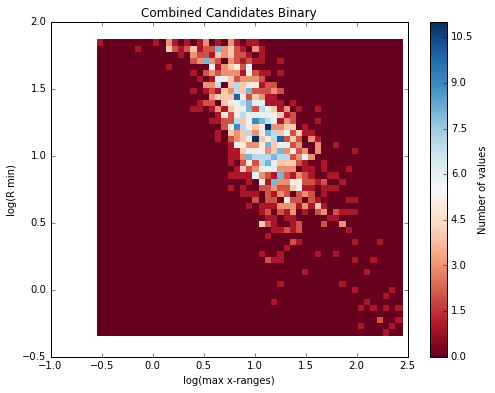

In [30]:
#For R min vs max x-range (for binaries only which consist of SB9 and Drew's List for a total of 2011 stars)
outfile=open('Binary Log Values.csv', 'w')
xs = np.append(SBXmax, DLXmax2)
ys = np.append(SBR,DLR2)

xmax=[]
R=[]
for i in range(len(xs)):
    xmax.append(math.log10(xs[i]))
    R.append(math.log10(ys[i]))
    outfile.write(str(xmax[i])+'\t'+str(R[i])+'\n')
outfile.close()

perBin = 0.04
binCt = int(perBin*len(xmax))
Grid1, X1_range, Y1_range =np.histogram2d(xmax, R, bins=binCt, range=None, normed=False, weights=None)
print(X1_range)

plt.figure(figsize=(8,6))
CS = plt.pcolor(X1_range, Y1_range,Grid1, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('Combined Candidates Binary' )
plt.savefig('Combined Cand. 2DHist for Binary Log Values.jpg', bbox_inches='tight')

max_grid  = np.argmax(Grid1)
ta = max_grid%Grid1.shape[0]
tb = max_grid/Grid1.shape[0]
found_index=find_index(xmax, R, X1_range, Y1_range, tb, ta)
print("Graham's algorithm found {0} indicies".format(found_index))
print(IDs[found_index])

Graham's algorithm found [49, 60, 85, 87, 152, 156, 278, 361, 458, 468, 488, 523, 524, 540, 541, 670] indicies
['2M21372506+4231458' '2M21373735+4137444' '2M21380635+4224478'
 '2M21381051+4320038' '2M21393102+4328503' '2M21393250+4304310'
 '2M21414146+4357534' '2M21430231+4158535' '2M21443896+4155263'
 '2M21444621+4324160' '2M21451274+4305367' '2M21454093+4157106'
 '2M21454301+4247497' '2M21461656+4135142' '2M21461789+4311461'
 '2M21495078+4307132']


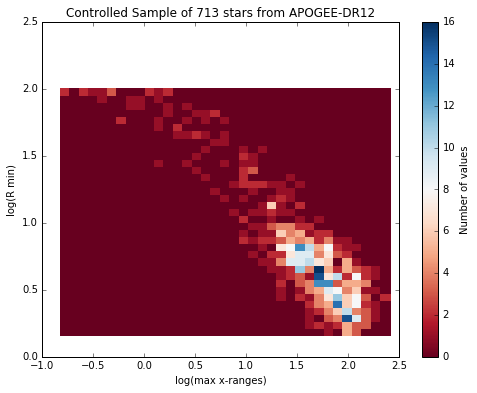

In [27]:
# Max x-ranges vs R min for Controlled Sample (713 Random APOGEE DR12 stars)
outfile2=open('Controlled Sample Log Values.lis', 'w')
Ax_max=[]
AR_min=[]
for k in range(len(ALX)):
    Ax_max.append(math.log10(ALX[k]))
    AR_min.append(math.log10(ALR[k]))
    outfile2.write(str(AmassID[k])+'\t'+str(Ax_max[k])+'\t'+str(AR_min[k])+ '\t' +str(ALX[k])+ '\t'+ str(ALR[k])+'\n')
outfile2.close()

perceBin = 0.05
binCount = int(perceBin*len(Ax_max))
gridz, Ax_range, Ay_range =np.histogram2d(Ax_max, AR_min, bins=binCount, range=None, normed=False, weights=None)

plt.figure(figsize=(8,6))
Z = plt.pcolor(Ax_range, Ay_range,gridz, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max x-ranges)')
plt.ylabel('log(R min)')
plt.title('Controlled Sample of 713 stars from APOGEE-DR12')
plt.savefig('APOGEE_DR12 Candidate Log Values.jpg', bbox_inches='tight')

max_size  = np.argmax(gridz)
a1 = max_size%gridz.shape[0]
a2 = max_size/gridz.shape[0]

found_indi=find_index(Ax_max, AR_min, Ax_range, Ay_range, a2, a1)
print("Graham's algorithm found {0} indicies".format(found_indi))
print(AmassID[found_indi])

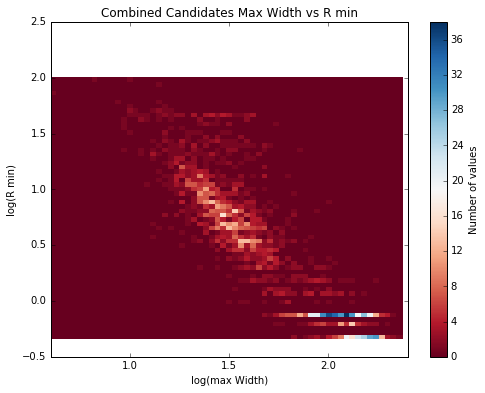

In [28]:
# For R min vs max widths (Lower region looks like there was an error in calling the variables)
Xs = np.append(SBWidth, DLWidth)
Ys = np.append(SBR, DLR)
binaryX = np.append(Xs,np.append(DLWidth2,ALWidth))
binaryR = np.append(Ys,np.append(DLR2,ALR))

#for just the binaries:
#binaryX = np.append(SBWidth, np.append(DLXWidth, DLXWidth2))
#binaryR = np.append(SBR, np.append(DLR, DLR2))

maxwidth=[]
R_min=[]
for i in range(len(binaryX)):
    maxwidth.append(math.log10(binaryX[i]))
    R_min.append(math.log10(binaryR[i]))
    
percBin = 0.03
BinCt = int(percBin*len(binaryX))
Grid2, x_range2, y_range2 =np.histogram2d(maxwidth, R_min, bins=BinCt, range=None, normed=False, weights=None)
plt.figure(figsize=(8,6))
CS = plt.pcolor(x_range2, y_range2,Grid2, cmap='RdBu')
plt.colorbar(label = 'Number of values')
plt.xlabel('log(max Width)')
plt.ylabel('log(R min)')
plt.title('Combined Candidates Max Width vs R min' )
plt.savefig('Comb. Candidates Width vs R 2DHist for Log Values.jpg', bbox_inches='tight')   



In [20]:
#Define function that can take in a coordinate from the 2D Hist and provide the log(max-XR) 
# and log(R min) associated with the (x,y) coordinate
def coordMatch(x,y):
    logxr = []
    logR = []
    match = []
    for i in range(len(x)):
        logxr.append(math.log10(x[i])) 
        logR.append(math.log10(y[i]))
        match.append([logxr[i],logR[i]])
    return match
# Coords for Controlled Sample 'Spine'
x = [1.24924,1.52268,1.73437,1.89315,2.00781]
y = [1.132,0.798902,0.668149,0.445868,0.30204]
ControlledSpine = coordMatch(x,y)

x_s = [0.75,1.0,1.25,1.5]
y_s = [1.6,125,0.90,0.55]
BinarySample = coordMatch(x_s,y_s)

print(ControlledSpine)
print #To provide an empty space
print(BinarySample)

[[0.09664588165898996, 0.053846426852252584], [0.18260864343039235, -0.09750649161160965], [0.23914175278083752, -0.1751266772520269], [0.27718502579234006, -0.3507936958991455], [0.3027226129273144, -0.5199355384040125]]

[[-0.12493873660829995, 0.2041199826559248], [0.0, 2.0969100130080562], [0.09691001300805642, -0.045757490560675115], [0.17609125905568124, -0.2596373105057561]]
